# Flight Geographical Data Analysis

In this project I will briefly explore the flight data, compiled by [openflights](https://openflights.org/data.html) in 2017, to answer the following questions:



### Which cities are the most important hubs for airports and airlines?

### For LGA, SFO, LAX and DFW, which airport destinations are frequented?
    
### What else can be seen from this data?


To accomplish this I will do the following:

1. Explore the Data
2. Clean the Data
3. Analyze the Data
4. Make Conclusions from my analysis



### 1. Explore the Data

In [1]:
import pandas as pd

airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


### 2. Clean the Data

From my brief exploration of the data, I can see the following:

- The data is clean for the purposes of my analysis, and as a result, I will not be cleaning it further.

### 3. Analyze the Data

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

In [3]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()

x, y = m(longitudes, latitudes)

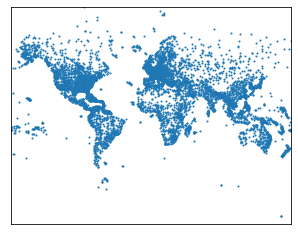

In [4]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longitudes, latitudes)
m.scatter(x,y,s=1)
plt.show()

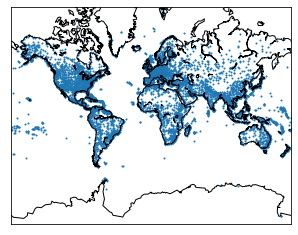

In [5]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

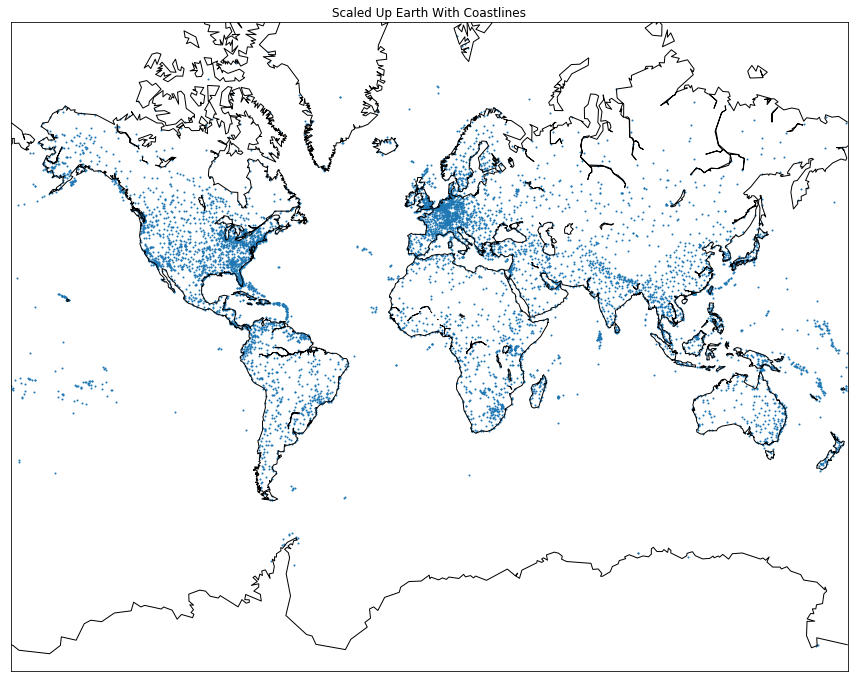

In [6]:
plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.title("Scaled Up Earth With Coastlines")
plt.show()

From the visualizations, I can see the following:

- The most important hubs for airports and airlines are located in two regions: 
        - The east coast of the US 
        - Western Europe

In [20]:
geo_routes = pd.read_csv("geo_routes.csv")
print(geo_routes.info())
print(geo_routes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
None
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  55.305836  55.012622


In [21]:
geo_routes["source"].value_counts(normalize = True).head(10)

ATL    0.013570
ORD    0.008275
PEK    0.007934
LHR    0.007816
CDG    0.007771
FRA    0.007371
LAX    0.007297
DFW    0.006956
JFK    0.006763
AMS    0.006718
Name: source, dtype: float64

In [23]:
geo_routes["dest"].value_counts(normalize = True).head(10)

ATL    0.013511
ORD    0.008157
PEK    0.007801
LHR    0.007771
CDG    0.007667
LAX    0.007386
FRA    0.007312
DFW    0.006926
JFK    0.006748
AMS    0.006674
Name: dest, dtype: float64

From the `geo_routes` data, I can see the following:

- The most important hubs for airports and airlines are located in the following airports: 
        - Atlanta 
        - Chicago
        - Beijing
        - London
        - Paris
        - Frankfurt
        - Los Angeles
        - Dallas
        - New York
        - Amsterdam

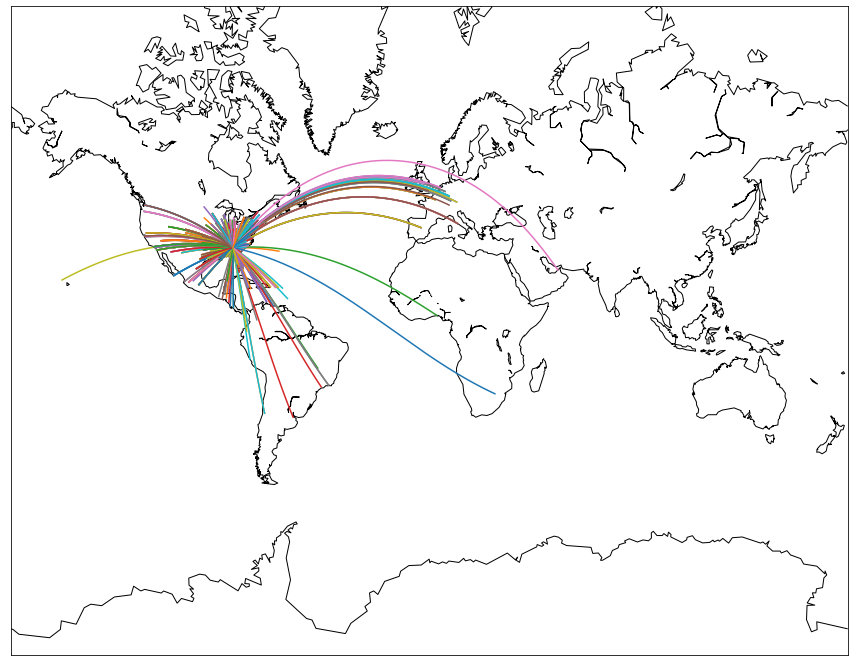

In [25]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

atl = geo_routes[geo_routes['source'] == "ATL"]
create_great_circles(atl)
plt.show()

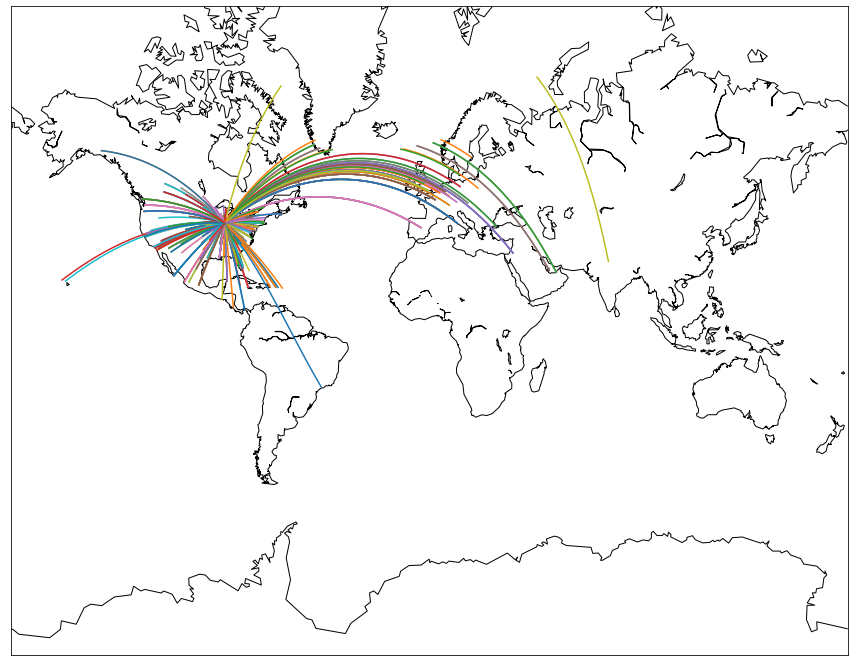

In [26]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

ord = geo_routes[geo_routes['source'] == "ORD"]
create_great_circles(ord)
plt.show()

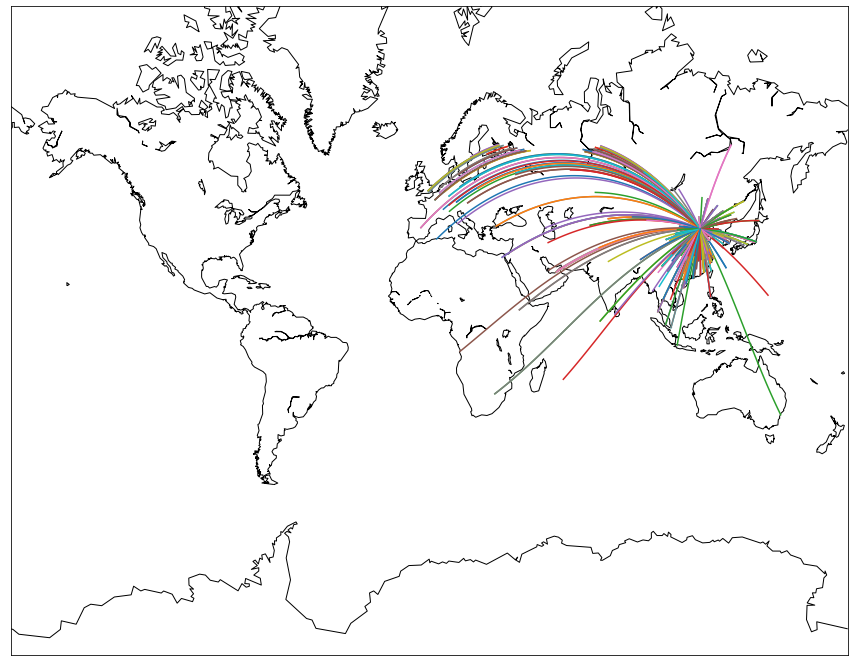

In [29]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

pek = geo_routes[geo_routes['source'] == "PEK"]
create_great_circles(pek)
plt.show()

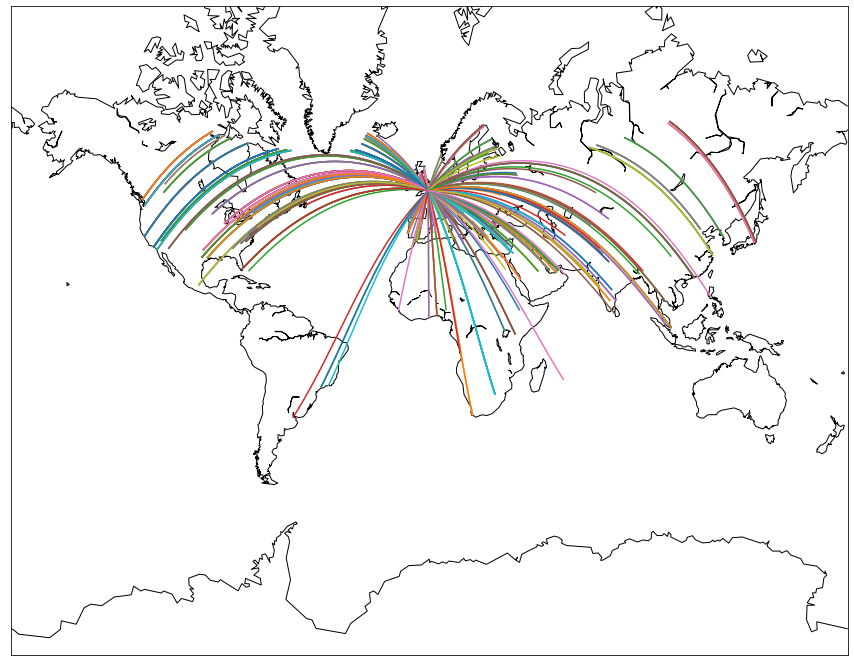

In [31]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

lhr = geo_routes[geo_routes['source'] == "LHR"]
create_great_circles(lhr)
plt.show()

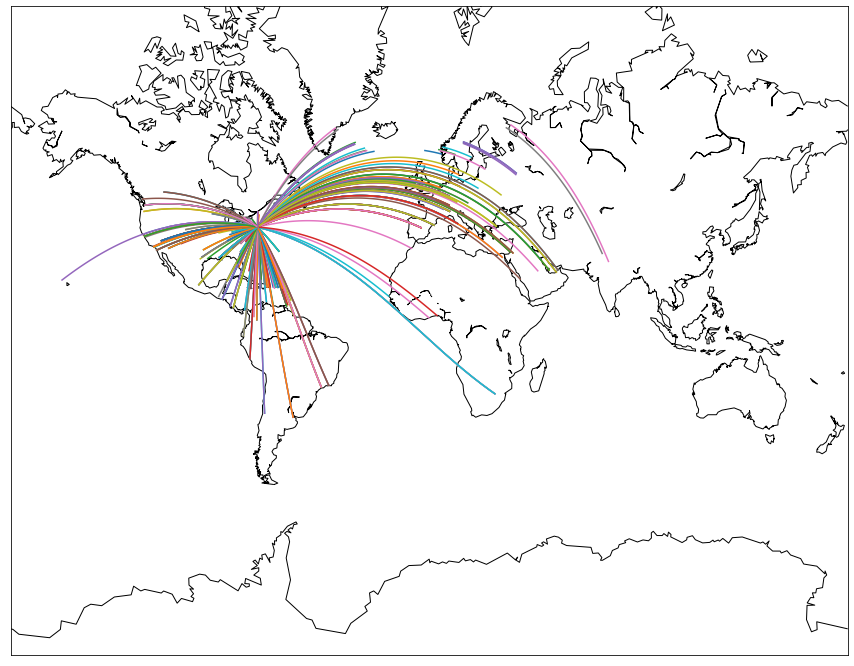

In [28]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

jfk = geo_routes[geo_routes['source'] == "JFK"]
create_great_circles(jfk)
plt.show()

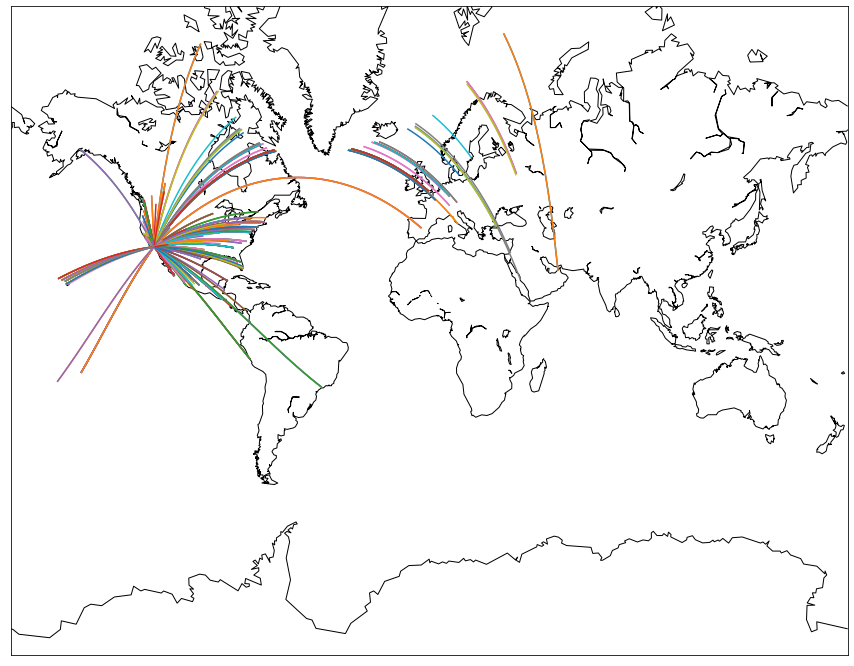

In [10]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

lax = geo_routes[geo_routes['source'] == "LAX"]
create_great_circles(lax)
plt.show()

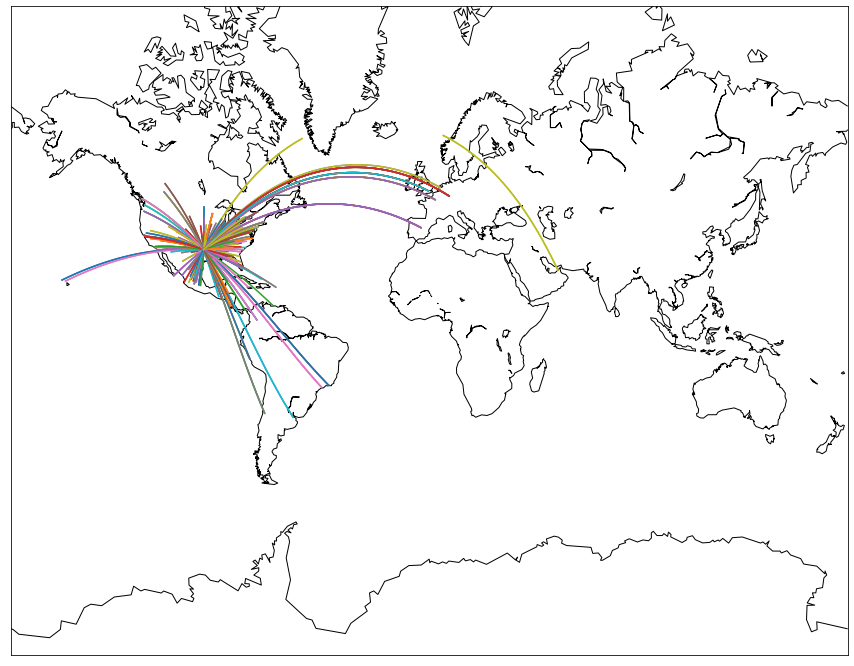

In [11]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

dfw = geo_routes[geo_routes['source'] == "DFW"]
create_great_circles(dfw)
plt.show()

### 4. Conclusion

From my analysis of the geographical flight data compiled by [openflights](https://openflights.org/data.html), I can conclude that certain regions around the world dominate the frquency of air travel as of 2017. 

#### Which cities are the most important hubs for airports and airlines?

From my visualization analysis, I can see that the most frequented regions for air travel are located in the east coast of the United States, and in Western Europe. If I analyze the geo_routes data, I can see that the following cities are the most frequented sources and destinations for travel:
 
        - Atlanta 
        - Chicago
        - Beijing
        - London
        - Paris
        - Frankfurt
        - Los Angeles
        - Dallas
        - New York
        - Amsterdam

It is clear that this data correlates with the visualization from my analysis. More than half of the top ten hubs are located in the east coast of the United States, or in Western Europe.


#### For ATL, ORD, PEK, LHR, JFK, LAX and DFW, which airport destinations are frequented?

Most of the locations on this list show travel to all of these most frequented regions. This explains why the top 10 sources for travel are the same as the top 10 destinations for travel.
    
#### What else can be seen from this data?

From further analysis of this data, governements and consumers can benefit. Govenrments can analyse the imprtant hubs for airports and airlines and use that information to  make more informed decisions about the running of these airports, their development, renovation, and spending around their infrastructure. For consumers, analyzing this data can help make better travel arrangements along less frquented routes if thats what is preferred, or to plan a multi-city trip if that's what is desired. Finally, this data can help better inform decisions around travel efficiency in potentially helping analysts find better routes for travel, making trips more affordable for the consumer, less expensive for airlines, a better use of aiports, and less impactful on the environment.